In [320]:
#importing all needed libraries
import numpy as np
import pandas as pd
import os
import requests
import json

# Gathering phase

In [321]:
# loading enhanced twitter archive file to dataframe as (df_archive)
df_archive = pd.read_csv('twitter_archive_enhanced.csv')

In [322]:
df_archive.head(1) #checking the imported file

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [323]:
# importing the image prediction file prgrammatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1].replace('-','_') 
r = requests.get(url)

if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(r.content)



In [324]:
# loading the download file (image_predictions.tsv) to dataframe as (df_image)
df_image = pd.read_csv('image_predictions.tsv', sep = '\t')

### I will be working from the downloaded files for the API data since i don't have the credentials

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [325]:
# reading the JSON file into a data frame
list = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
df_api = pd.DataFrame(list)
df_api.head() #checking the dataframe


,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


# Assessing phase

### assessing vissually 

In [7]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [9]:
df_api

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


## Assessing programmaticaly 

In [10]:
df_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [11]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
df_archive['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [13]:
df_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
df_archive.groupby('text')['rating_numerator','rating_denominator'].sum() #many extraction mistakes and also ('\n') in some of texts

,rating_numerator,rating_denominator
text,,
"""AND IIIIIIIIIIIEIIIIIIIIIIIII WILL ALWAYS LOVE YOUUUUU"" 11/10 https://t.co/rSNCEiTtfI",11,10
"""AT DAWN, WE RIDE""\n10/10 for both dogs https://t.co/3aXX6wH6it",10,10
"""Can you behave? You're ruining my wedding day""\nDOG: idgaf this flashlight tastes good as hell\n\n10/10 https://t.co/GlFZPzqcEU",10,10
"""Challenge accepted""\n10/10 https://t.co/vNjvr5Bl9u",10,10
"""Challenge completed"" \n(pupgraded to 12/10) https://t.co/85dTK7XCXB",12,10
"""Dammit hooman I'm jus trynna lik the fler"" 11/10 https://t.co/eRZRI8OTj7",11,10
"""Dammit hooman quit playin I jus wanna wheat thin"" 11/10 https://t.co/yAASRDPJnQ",11,10
"""Don't ever talk to me or my son again."" ...both 10/10 https://t.co/b8ncwl6TlE",10,10
"""Don't talk to me or my son ever again"" ...10/10 for both https://t.co/s96OYXZIfK",10,10


In [15]:
x = df_archive.query('rating_denominator > 10 | rating_denominator < 10')
x

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [16]:
#will print the whole text of datafram above in to check numerators and denominators
print(df_archive['text'][342]+'\n') # no rating
print(df_archive['text'][313]+'\n') # no picture should be deleted
print(df_archive['text'][433]+'\n') # 6 dogs
print(df_archive['text'][516]+'\n') # no rating
print(df_archive['text'][784]+'\n') # it's a retweet, will be deleted when cleaning
print(df_archive['text'][902]+'\n') # 15 dogs
print(df_archive['text'][1068]+'\n') # correct rating is 14/10, needs to be changed
print(df_archive['text'][1120]+'\n') # 17 dogs
print(df_archive['text'][1165]+'\n') # correct rating is 13/10
print(df_archive['text'][1202]+'\n') # correct rating is 11/10
print(df_archive['text'][1228]+'\n') # 9 dogs
print(df_archive['text'][1254]+'\n') # 8 dogs
print(df_archive['text'][1274]+'\n') # 5 dogs
print(df_archive['text'][1351]+'\n') # 4 dogs
print(df_archive['text'][1433]+'\n') # 4 dogs
print(df_archive['text'][1598]+'\n') # no picture , should be deleted
print(df_archive['text'][1634]+'\n') # 13 dogs
print(df_archive['text'][1635]+'\n') # this rating was mistaken and changed in previous, should be deleted
print(df_archive['text'][1662]+'\n') # correct rating is 10/10
print(df_archive['text'][1663]+'\n') # no picture , should be deleted
print(df_archive['text'][1779]+'\n') # 14 dogs
print(df_archive['text'][1843]+'\n') # 8 dogs
print(df_archive['text'][2335]+'\n') # correct rating is 9/10

@docmisterio account started on 11/15/15

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho

The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…

Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE

After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv

Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a

This is Bluebert. He just saw that 

In [17]:
# some weird numerators
print(df_archive['text'][979]+'\n') #too extreme rating,will keep it if it won't affect my analysis
print(df_archive['text'][315]+'\n') #a rating of 0/10 cu it was stolen picture, should be deleted

This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh

When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag



In [18]:
df_archive.iloc[:,np.r_[5:6,12:13]]

,text,name
0,This is Phineas. He's a mystical boy. Only eve...,Phineas
1,This is Tilly. She's just checking pup on you....,Tilly
2,This is Archie. He is a rare Norwegian Pouncin...,Archie
3,This is Darla. She commenced a snooze mid meal...,Darla
4,This is Franklin. He would like you to stop ca...,Franklin
5,Here we have a majestic great white breaching ...,None
6,Meet Jax. He enjoys ice cream so much he gets ...,Jax
7,When you watch your owner call another dog a g...,None
8,This is Zoey. She doesn't want to be one of th...,Zoey
9,This is Cassie. She is a college pup. Studying...,Cassie


In [19]:
df_archive.duplicated().sum()

0

In [20]:
df_archive.tweet_id.duplicated().sum()

0

In [21]:
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

## assessing df_image programmatically 

In [22]:
df_image.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [23]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
df_image.duplicated().sum()

0

In [25]:
df_image.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [26]:
df_image.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [27]:
df_image.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [28]:
df_image.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
web_site                      19
Cardigan                      19
Maltese_dog                   18
Shetland_sheepdog             18
beagle                        18
Eskimo_dog                    18
teddy                         18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [29]:
df_image.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Pembroke                           27
Eskimo_dog                         27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
chow                               20
Samoyed                            20
malinois                           20
miniature_pinscher                 20
toy_terrier                        20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [30]:
df_image.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
Pomeranian                        29
Pekinese                          29
toy_poodle                        29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

In [31]:
df_image.jpg_url.duplicated().sum()

66

In [32]:
df_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

## Assessing df_api

In [33]:
df_api.head(1)

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193


In [34]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [35]:
df_api.duplicated().sum()

0

In [36]:
df_api.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


# Assessing output
#### Quality aspects:
   ###### df_archive
       - Some columns won't be needed (needs to be dropped)       
       - some ratings denominators aren't 10
       - some ratings numerators are extracted wrong
       - some NaN values
       - timestamp dtype is an object
       - 181 retweets needs to be dropped (from all dataframes if existed)
       - some tweets got no images(needs to be dropped)
       - text column has '\n' (need to be deleted)
       - null values are 'None' in dog classification part
   ###### df_image
       - 66 duplicated jpg_url (needs to be deleted)
       - some columns aren't needed(we only need one for prediction and one 
         for confidence level
       - drop retweets and replies
   ###### df_api
       - retweets needs to be dropped
       
       
#### Tidiness aspects:
   ###### df_archive
       - columns of dog classifications are values and can't be column names
   ###### df_image
       - needes to be merged with df_enhanced after being cleaned
   ###### df_api
       - needs to be merged 

# Cleaning phase


In [326]:
# first step is to get a copy of each dataset

df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_api_clean = df_api.copy()

## df_archive
#### 1) deleting retweets and replies , please note that tweets with images will be dropped after merging df_image_clean dataset
As we checked during assessment, there are 181 retweets and 78 replies. We will drop them using retweeted_status_id column and in_reply_to_user_id

In [327]:
# REMOVING RETWEETS AND REPLIES
#code
df_archive_clean = df_archive_clean[pd.isnull(df_archive_clean.retweeted_status_id)]
df_archive_clean = df_archive_clean[pd.isnull(df_archive_clean.in_reply_to_user_id)]
#Test
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### 2) dropping the columns which won't be needed in the analysis

In [328]:
# get the columns names
print(df_archive_clean.columns)
#Code
df_archive_clean = df_archive_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp','expanded_urls','source'])
#Test
df_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')


Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### 3) changing timestamp dtype

In [329]:
#code
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)
#Test
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 180.2+ KB


### 4) deleting ('\n') from some values in text column

In [330]:
#Code
df_archive_clean.text = df_archive_clean.text.str.replace(r"\n", " ")
#Test , I used the same filter i used while assessing 
df_archive_clean.groupby('text')['rating_numerator','rating_denominator'].sum().head(5)

,rating_numerator,rating_denominator
text,,
"""AND IIIIIIIIIIIEIIIIIIIIIIIII WILL ALWAYS LOVE YOUUUUU"" 11/10 https://t.co/rSNCEiTtfI",11,10
"""AT DAWN, WE RIDE"" 10/10 for both dogs https://t.co/3aXX6wH6it",10,10
"""Can you behave? You're ruining my wedding day"" DOG: idgaf this flashlight tastes good as hell 10/10 https://t.co/GlFZPzqcEU",10,10
"""Challenge accepted"" 10/10 https://t.co/vNjvr5Bl9u",10,10
"""Dammit hooman I'm jus trynna lik the fler"" 11/10 https://t.co/eRZRI8OTj7",11,10


### 5) None values need to be changed to NaN, here i'll divide this step into two , for now i will just replace it with empty "" cell  and after merging the dog stages I will replace it by np.nan

In [331]:
#Code
df_archive_clean = df_archive_clean.replace('None',"")
#Test
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 180.2+ KB


### Fixing Numerators and Denominators 
##### will assess the cleaned data again for wrong numerators and denominators , since the previous assessment had replies and retweets

In [332]:
x = df_archive_clean.query('rating_denominator > 10 | rating_denominator < 10')
x

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40,The floofs have been released I repeat the flo...,84,70,,,,,
516,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,,,,
902,758467244762497024,2016-07-28 01:00:57,Why does this never happen at my front door......,165,150,,,,,
1068,740373189193256964,2016-06-08 02:41:38,"After so many requests, this is Bretagne. She ...",9,11,,,,,
1120,731156023742988288,2016-05-13 16:15:54,Say hello to this unbelievably well behaved sq...,204,170,this,,,,
1165,722974582966214656,2016-04-21 02:25:47,Happy 4/20 from the squad! 13/10 for all https...,4,20,,,,,
1202,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #Final...,50,50,Bluebert,,,,
1228,713900603437621249,2016-03-27 01:29:02,Happy Saturday here's 9 puppers on a bench. 99...,99,90,,,,,
1254,710658690886586372,2016-03-18 02:46:49,Here's a brigade of puppers. All look very pre...,80,80,,,,,
1274,709198395643068416,2016-03-14 02:04:08,"From left to right: Cletus, Jerome, Alejandro,...",45,50,,,,,


In [333]:
y = df_archive_clean.query('rating_numerator > 15 | rating_numerator < 6')
y

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19,This is Bella. She hopes her smile made you sm...,5,10,Bella,,,,
315,835152434251116546,2017-02-24 15:40:31,When you're so blinded by your systematic plag...,0,10,,,,,
433,820690176645140481,2017-01-15 17:52:40,The floofs have been released I repeat the flo...,84,70,,,,,
516,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,,,,
695,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",75,10,Logan,,,,
730,781661882474196992,2016-09-30 01:08:10,Who keeps sending in pictures without dogs in ...,5,10,,,,,
763,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,,,pupper,
765,777885040357281792,2016-09-19 15:00:20,This is Wesley. He's clearly trespassing. Seem...,3,10,Wesley,,,,
883,760252756032651264,2016-08-01 23:15:56,This is Fido. He can tell the weather. Not goo...,4,10,Fido,,,,
902,758467244762497024,2016-07-28 01:00:57,Why does this never happen at my front door......,165,150,,,,,


### 6) fixing denomerators which aren't 10(some are multiple dogs and some are wrong extraction of ratings), some tweets will be deleted. so my approach will be fixing the wrong extracted denominators and delete those with multiple dogs

In [334]:
# first correcting some wrong ratings manually
#Code
df_archive_clean.loc[(df_archive_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
df_archive_clean.loc[(df_archive_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

df_archive_clean.loc[(df_archive_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
df_archive_clean.loc[(df_archive_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

df_archive_clean.loc[(df_archive_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 11
df_archive_clean.loc[(df_archive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

df_archive_clean.loc[(df_archive_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
df_archive_clean.loc[(df_archive_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

df_archive_clean.loc[(df_archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
df_archive_clean.loc[(df_archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

# some tweets will be deleted (one has no rating at all and one has 0/10 rating) and also also tweets with denominator > 10 
#since they are multiple dogs and analysis won't be accurate

df_archive_clean = df_archive_clean[df_archive_clean.tweet_id != 810984652412424192]
df_archive_clean = df_archive_clean[df_archive_clean.tweet_id != 835152434251116546]

df_archive_clean = df_archive_clean[df_archive_clean['rating_denominator'] == 10]

#Test 
df_archive_clean.rating_denominator.value_counts()

10    2084
Name: rating_denominator, dtype: int64

## df_image

### 7) There are 66 jpg_url duplicated that needs to be dropped

In [335]:
#Code
df_image_clean = df_image_clean.drop_duplicates(subset=['jpg_url'], keep='last')
#Test
df_image_clean.jpg_url.duplicated().sum()

0

### 8) dataframe needs to be reshaped

In [336]:
#CODE: the first true prediction (p1, p2 or p3) will be stored in these lists
dog_type = []
confidence_level = []


def image(df_image_clean):
    if df_image_clean['p1_dog'] == True:
        dog_type.append(df_image_clean['p1'])
        confidence_level.append(df_image_clean['p1_conf'])
    elif df_image_clean['p2_dog'] == True:
        dog_type.append(df_image_clean['p2'])
        confidence_level.append(df_image_clean['p2_conf'])
    elif df_image_clean['p3_dog'] == True:
        dog_type.append(df_image_clean['p3'])
        confidence_level.append(df_image_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_level.append('Error')

        
df_image_clean.apply(image, axis=1)

#create new columns
df_image_clean['dog_type'] = dog_type
df_image_clean['confidence_level'] = confidence_level

In [337]:
#drop rows that has prediction_list 'error'
df_image_clean = df_image_clean[df_image_clean['dog_type'] != 'Error']

#TEST: 
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id            1691 non-null int64
jpg_url             1691 non-null object
img_num             1691 non-null int64
p1                  1691 non-null object
p1_conf             1691 non-null float64
p1_dog              1691 non-null bool
p2                  1691 non-null object
p2_conf             1691 non-null float64
p2_dog              1691 non-null bool
p3                  1691 non-null object
p3_conf             1691 non-null float64
p3_dog              1691 non-null bool
dog_type            1691 non-null object
confidence_level    1691 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


### 9)dropping columns which we won't use

In [338]:
#Code
df_image_clean = df_image_clean.drop(['img_num', 'p1','p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

#TEST
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id            1691 non-null int64
jpg_url             1691 non-null object
dog_type            1691 non-null object
confidence_level    1691 non-null object
dtypes: int64(1), object(3)
memory usage: 66.1+ KB


## Tidiness
### df_Archive_clean

#### 1) dogs' classifications are in four seperate columns, will add it in dog_classification column

In [340]:
#Code

df_archive_clean['dog_class'] = df_archive_clean['doggo'] + df_archive_clean['floofer'] + df_archive_clean['pupper'] + df_archive_clean['puppo']

#Test
df_archive_clean.dog_class.value_counts()

                1748
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggofloofer       1
doggopuppo         1
Name: dog_class, dtype: int64

In [341]:
# will now rename the values of cells with more than one dog stage and drop the [doggo,floofer,pupper,puppo] columns
#Code 
df_archive_clean.loc[(df_archive_clean.dog_class == 'doggopupper'), 'dog_class'] = 'doggo-pupper'
df_archive_clean.loc[(df_archive_clean.dog_class == 'doggofloofer'), 'dog_class'] = 'doggo-floofer'
df_archive_clean.loc[(df_archive_clean.dog_class == 'doggopuppo'), 'dog_class'] = 'doggo-puppo'

# dropping the unneeded columns
df_archive_clean = df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'],1)

#TEST 
print(df_archive_clean.info())
print(df_archive_clean.dog_class.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2084 non-null int64
timestamp             2084 non-null datetime64[ns]
text                  2084 non-null object
rating_numerator      2084 non-null int64
rating_denominator    2084 non-null int64
name                  2084 non-null object
dog_class             2084 non-null object
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 130.2+ KB
None
                 1748
pupper            221
doggo              72
puppo              23
floofer             9
doggo-pupper        9
doggo-puppo         1
doggo-floofer       1
Name: dog_class, dtype: int64


## will continue the quality  issue no. (5) . will change those values to Nan now

In [342]:
#Code
df_archive_clean = df_archive_clean.replace('',np.nan)
#Test
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2084 non-null int64
timestamp             2084 non-null datetime64[ns]
text                  2084 non-null object
rating_numerator      2084 non-null int64
rating_denominator    2084 non-null int64
name                  1491 non-null object
dog_class             336 non-null object
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 130.2+ KB


### df_image_clean 
#### 2) needs to be merged to main dataframe also tweets with no images will be deleted

In [343]:
#CODE: create a new dataframe that merge twitter_archive_clean and 
#image_prediction_clean
df_main1 = pd.merge(df_archive_clean, 
                      df_image_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_main1 = df_main1[df_main1['jpg_url'].notnull()]

#TEST
df_main1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1594 entries, 1 to 2083
Data columns (total 10 columns):
tweet_id              1594 non-null int64
timestamp             1594 non-null datetime64[ns]
text                  1594 non-null object
rating_numerator      1594 non-null int64
rating_denominator    1594 non-null int64
name                  1219 non-null object
dog_class             248 non-null object
jpg_url               1594 non-null object
dog_type              1594 non-null object
confidence_level      1594 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 137.0+ KB


## df_api
#### 3) needs to be merged with main dataframe

In [344]:
# Code
df_main = pd.merge(df_main1,df_api_clean, how = 'left', on = ['tweet_id'])

#Test 
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1594 entries, 0 to 1593
Data columns (total 12 columns):
tweet_id              1594 non-null int64
timestamp             1594 non-null datetime64[ns]
text                  1594 non-null object
rating_numerator      1594 non-null int64
rating_denominator    1594 non-null int64
name                  1219 non-null object
dog_class             248 non-null object
jpg_url               1594 non-null object
dog_type              1594 non-null object
confidence_level      1594 non-null object
favorite_count        1594 non-null int64
retweet_count         1594 non-null int64
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 161.9+ KB


# Storing the cleaned dataframe

In [345]:
df_main.to_csv('twitter_archive_master.csv', index = False)

# Analyzing the wrangled data with visualizations 

In [346]:
import matplotlib.pyplot as plt
% matplotlib inline


In [347]:
df_main.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_class,jpg_url,dog_type,confidence_level,favorite_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,33819,6514
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,25461,4328
2,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,42908,8964
3,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,41048,9774
4,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,20562,3261


In [348]:
df_main.rating_numerator.value_counts()

12    402
10    352
11    339
13    204
9     132
8      68
7      31
14     20
6      16
5      14
4       6
3       5
2       2
75      1
27      1
26      1
Name: rating_numerator, dtype: int64

In [349]:
df_main.columns.tolist()

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_class',
 'jpg_url',
 'dog_type',
 'confidence_level',
 'favorite_count',
 'retweet_count']

In [350]:
df_main.favorite_count.describe()

count      1594.000000
mean       8670.552698
std       11786.574413
min          81.000000
25%        2079.000000
50%        4173.500000
75%       10941.500000
max      132810.000000
Name: favorite_count, dtype: float64

In [351]:
df_main.retweet_count.describe()

count     1594.000000
mean      2576.883312
std       4339.126646
min         16.000000
25%        619.250000
50%       1367.000000
75%       3017.000000
max      79515.000000
Name: retweet_count, dtype: float64

   ## First insight, (Golder Retriever) is the most predicted dog type

In [352]:
df_main.dog_type.value_counts()

golden_retriever                  139
Labrador_retriever                 98
Pembroke                           93
Chihuahua                          86
pug                                60
toy_poodle                         49
chow                               44
Pomeranian                         41
Samoyed                            38
malamute                           32
Chesapeake_Bay_retriever           31
French_bulldog                     30
cocker_spaniel                     26
miniature_pinscher                 23
Eskimo_dog                         22
German_shepherd                    21
Siberian_husky                     20
Shih-Tzu                           20
Staffordshire_bullterrier          19
Maltese_dog                        19
beagle                             19
Cardigan                           19
Rottweiler                         18
Shetland_sheepdog                  18
kuvasz                             17
basset                             17
Italian_grey

## first graph showing the top 10 dog types with highest retweets counts

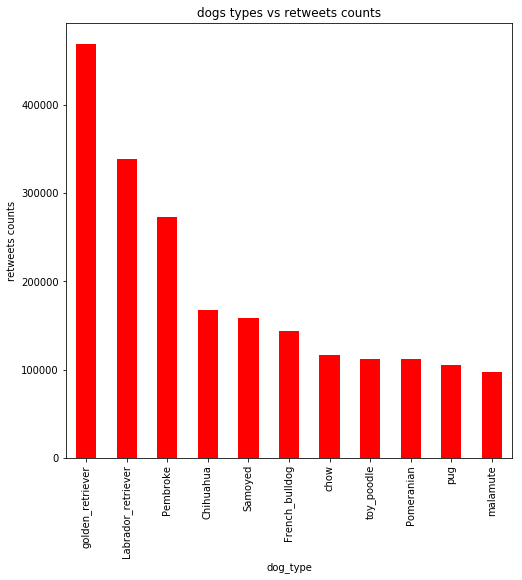

In [353]:
first_graph = df_main.groupby('dog_type').retweet_count.sum().sort_values(ascending=False)[10::-1]
first_graph.plot(kind='bar',color='red',figsize=(8,8));
plt.title('dogs types vs retweets counts');
plt.xlabel('dog_type');
plt.ylabel('retweets counts');
plt.gca().invert_xaxis();

## second graph showing the top 10 dog types with highest favorite counts

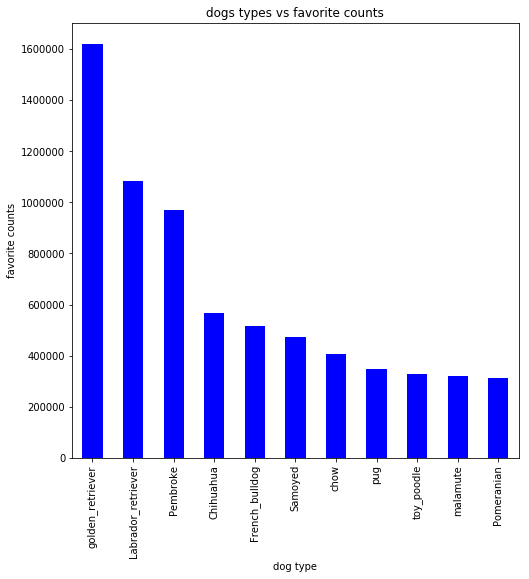

In [354]:
second_graph = df_main.groupby('dog_type').favorite_count.sum().sort_values(ascending=False)[10::-1]
second_graph.plot(kind='bar',color='blue',figsize=(8,8));
plt.title('dogs types vs favorite counts');
plt.xlabel('dog type');
plt.ylabel('favorite counts');
plt.gca().invert_xaxis();

## second insight is that tweets counts and favorite counts have "linear relation" or directly proportional to each other

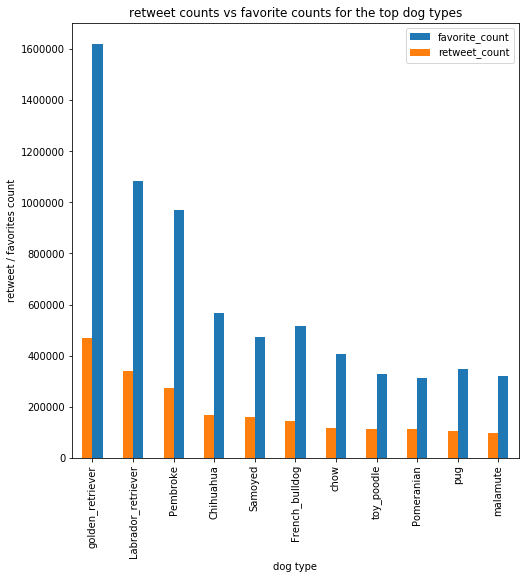

In [355]:
third_graph = df_main.groupby('dog_type')['favorite_count','retweet_count'].sum().sort_values(ascending=False,by=['retweet_count'])[10::-1]
third_graph.plot(kind='bar',figsize=(8,8));
plt.title('retweet counts vs favorite counts for the top dog types');
plt.xlabel('dog type');
plt.ylabel('retweet / favorites count');
plt.gca().invert_xaxis();

## Third insight is that the dogs with the highest ratings don't have the highest retweets counts

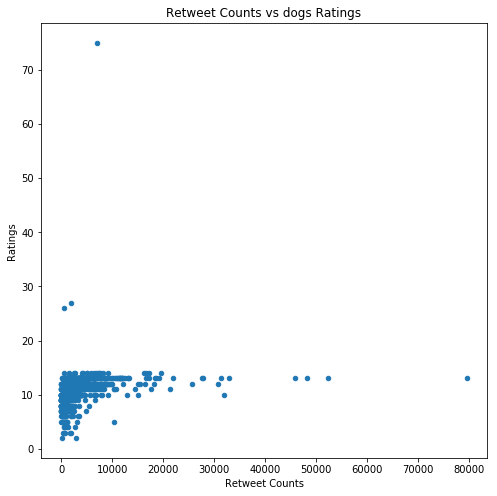

In [356]:
df_main.plot(x='retweet_count', y='rating_numerator', kind='scatter',figsize=(8,8));
plt.xlabel('Retweet Counts');
plt.ylabel('Ratings');
plt.title('Retweet Counts vs dogs Ratings');